In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv("cleaned_US_Accidents.csv", index_col=0)

In [20]:
print(df.columns.tolist())

['Severity', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Weather_Condition_Score']


In [3]:
infrastructure = df.columns.tolist()[11:-1]
X = df[infrastructure]
y = df['Severity']

In [18]:
print(X.columns)

Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Weather_Condition_Score'],
      dtype='object')


In [13]:
df.groupby('Traffic_Signal')['Severity'].value_counts(normalize=True)

Traffic_Signal  Severity
False           2           0.743692
                3           0.213286
                4           0.037185
                1           0.005837
True            2           0.869359
                3           0.088514
                1           0.022294
                4           0.019833
Name: proportion, dtype: float64

In [5]:
#one hot encoding
X = X.astype(int)

#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#train the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rfc.fit(X_train, y_train)

print("OOB score:", rfc.oob_score_)

OOB score: 0.7630868111698935


In [6]:
#get the feature importances
importance = rfc.feature_importances_
feat_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

print("Feature Importance:")
print(feat_importance)

Feature Importance:
Traffic_Signal             0.347209
Crossing                   0.314060
Stop                       0.126836
Station                    0.070114
Amenity                    0.037670
Junction                   0.036105
Railway                    0.027486
Weather_Condition_Score    0.018604
Traffic_Calming            0.006427
No_Exit                    0.006286
Give_Way                   0.006271
Bump                       0.002433
Roundabout                 0.000499
Turning_Loop               0.000000
dtype: float64


In [17]:
#finding if it's biased or not
# Take a 10% or 5% sample of X_test
X_test_small = X_test.sample(frac=0.50, random_state=42)
y_test_small = y_test.loc[X_test_small.index]

r = permutation_importance(rfc, X_test_small, y_test_small, n_repeats=10, random_state=42)

for name, imp in zip(X_test.columns, r.importances_mean):
    print(name, imp)

Amenity 3.5602162022196904e-05
Bump 7.282260413588037e-06
Crossing 0.00011975272680195826
Give_Way 1.4564520827264893e-05
Junction 0.00041832540376088854
No_Exit 6.554034372269202e-05
Railway -0.00010195164579085425
Roundabout 0.0
Station -0.0001505000485483965
Stop 0.00010114250574488892
Traffic_Calming 8.900540505507593e-06
Traffic_Signal 0.00011247046638832581
Turning_Loop 0.0
Weather_Condition_Score -4.8548402757553345e-05


In [7]:
print("Train accuracy:", rfc.score(X_train, y_train))
print("Test accuracy:", rfc.score(X_test, y_test))

Train accuracy: 0.7631771650198441
Test accuracy: 0.7640718998935985


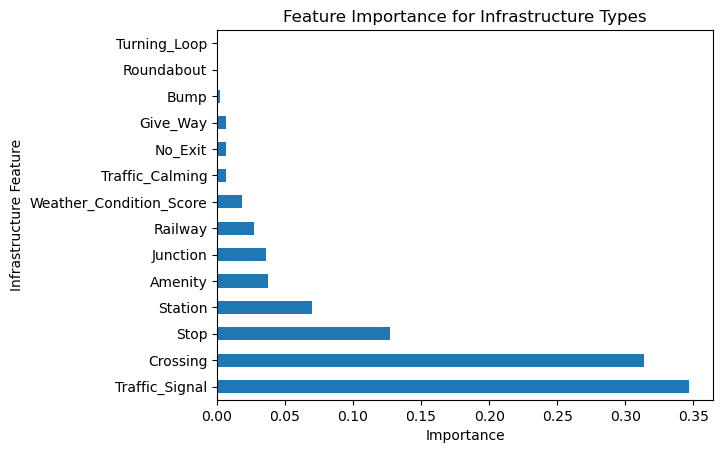

In [8]:
feat_importance.plot(kind='barh')
plt.title("Feature Importance for Infrastructure Types")
plt.xlabel("Importance")
plt.ylabel("Infrastructure Feature")
plt.show()

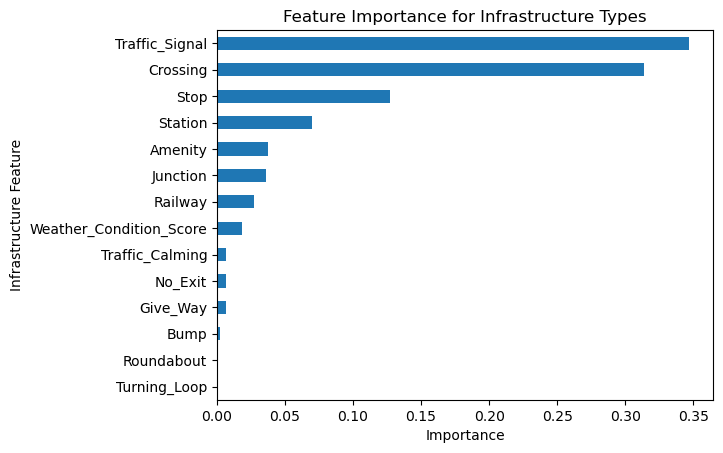

In [9]:
feat_importance[::-1].plot(kind='barh')
plt.title("Feature Importance for Infrastructure Types")
plt.xlabel("Importance")
plt.ylabel("Infrastructure Feature")
plt.show()